Import necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

DATA LOADING

In [25]:
# Load dataset from UCI
url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
df = pd.read_csv(url)

print("Data successfully loaded!")
print(f"Dataset shape: {df.shape}")
print(df.head())

Data successfully loaded!
Dataset shape: (253680, 23)
   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Se

# **DATA PREPROCESSING**

In [34]:

# STEP 1: Split Data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}\n")

#  STEP 2: Check and Remove Duplicates

## Check for duplicate rows in the training set
print(f"Duplicate rows in training set: {X_train.duplicated().sum()}")
X_train = X_train.drop_duplicates()

## Check for duplicate rows in the test set
print(f"Duplicate rows in test set: {X_test.duplicated().sum()}")
X_test = X_test.drop_duplicates()

print(f"Training set shape after removing duplicates: {X_train.shape}")
print(f"Testing set shape after removing duplicates: {X_test.shape}\n")

# STEP 3: Preprocessing on Training Data

## Handle Missing Values in Training Set
train_threshold = 0.1 * len(X_train)  # 10% of training data size
missing_train = X_train.isnull().sum()

# Drop columns with too many missing values in the training set
X_train = X_train.drop(columns=missing_train[missing_train > train_threshold].index)

# Impute missing values in the training set
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Categorical
        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
    else:  # Continuous
        X_train[column].fillna(X_train[column].median(), inplace=True)

print("Missing values in training set after imputation:\n", X_train.isnull().sum())

# Preprocessing on Test Data

## Handle Missing Values in Test Set (based only on test set statistics)
test_threshold = 0.1 * len(X_test)  # 10% of test data size
missing_test = X_test.isnull().sum()

# Drop columns with too many missing values in the test set
X_test = X_test.drop(columns=missing_test[missing_test > test_threshold].index)

# Impute missing values in the test set
for column in X_test.columns:
    if X_test[column].dtype == 'object':  # Categorical
        X_test[column].fillna(X_test[column].mode()[0], inplace=True)
    else:  # Continuous
        X_test[column].fillna(X_test[column].median(), inplace=True)

print("Missing values in test set after imputation:\n", X_test.isnull().sum())

# STEP 4: Encoding Categorical Variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in both training and testing sets (if needed)
X_train, X_test = X_train.align(X_test, join='inner', axis=1)
print("1")
# STEP 5: Feature Scaling
continuous_features = ['BMI', 'Age']  # Example continuous features

scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])
print("2")
# STEP 6: Balance the Training Set Using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled training set shape: {X_train_resampled.shape}, {y_train_resampled.shape}\n")

# STEP 7: Display Final Dataset Shapes
print(f"Final Training set shape: {X_train_resampled.shape}, {y_train_resampled.shape}")
print(f"Final Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (177576, 22), (177576,)
Testing set shape: (76104, 22), (76104,)

Duplicate rows in training set: 0
Duplicate rows in test set: 0
Training set shape after removing duplicates: (177576, 22)
Testing set shape after removing duplicates: (76104, 22)



<ipython-input-34-c66a2f87c256>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(X_train[column].median(), inplace=True)
<ipython-input-34-c66a2f87c256>:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Missing values in training set after imputation:
 ID                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Missing values in test set after imputation:
 ID                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHeal

PREPROCESSING RESULTS

<Figure size 1200x600 with 0 Axes>

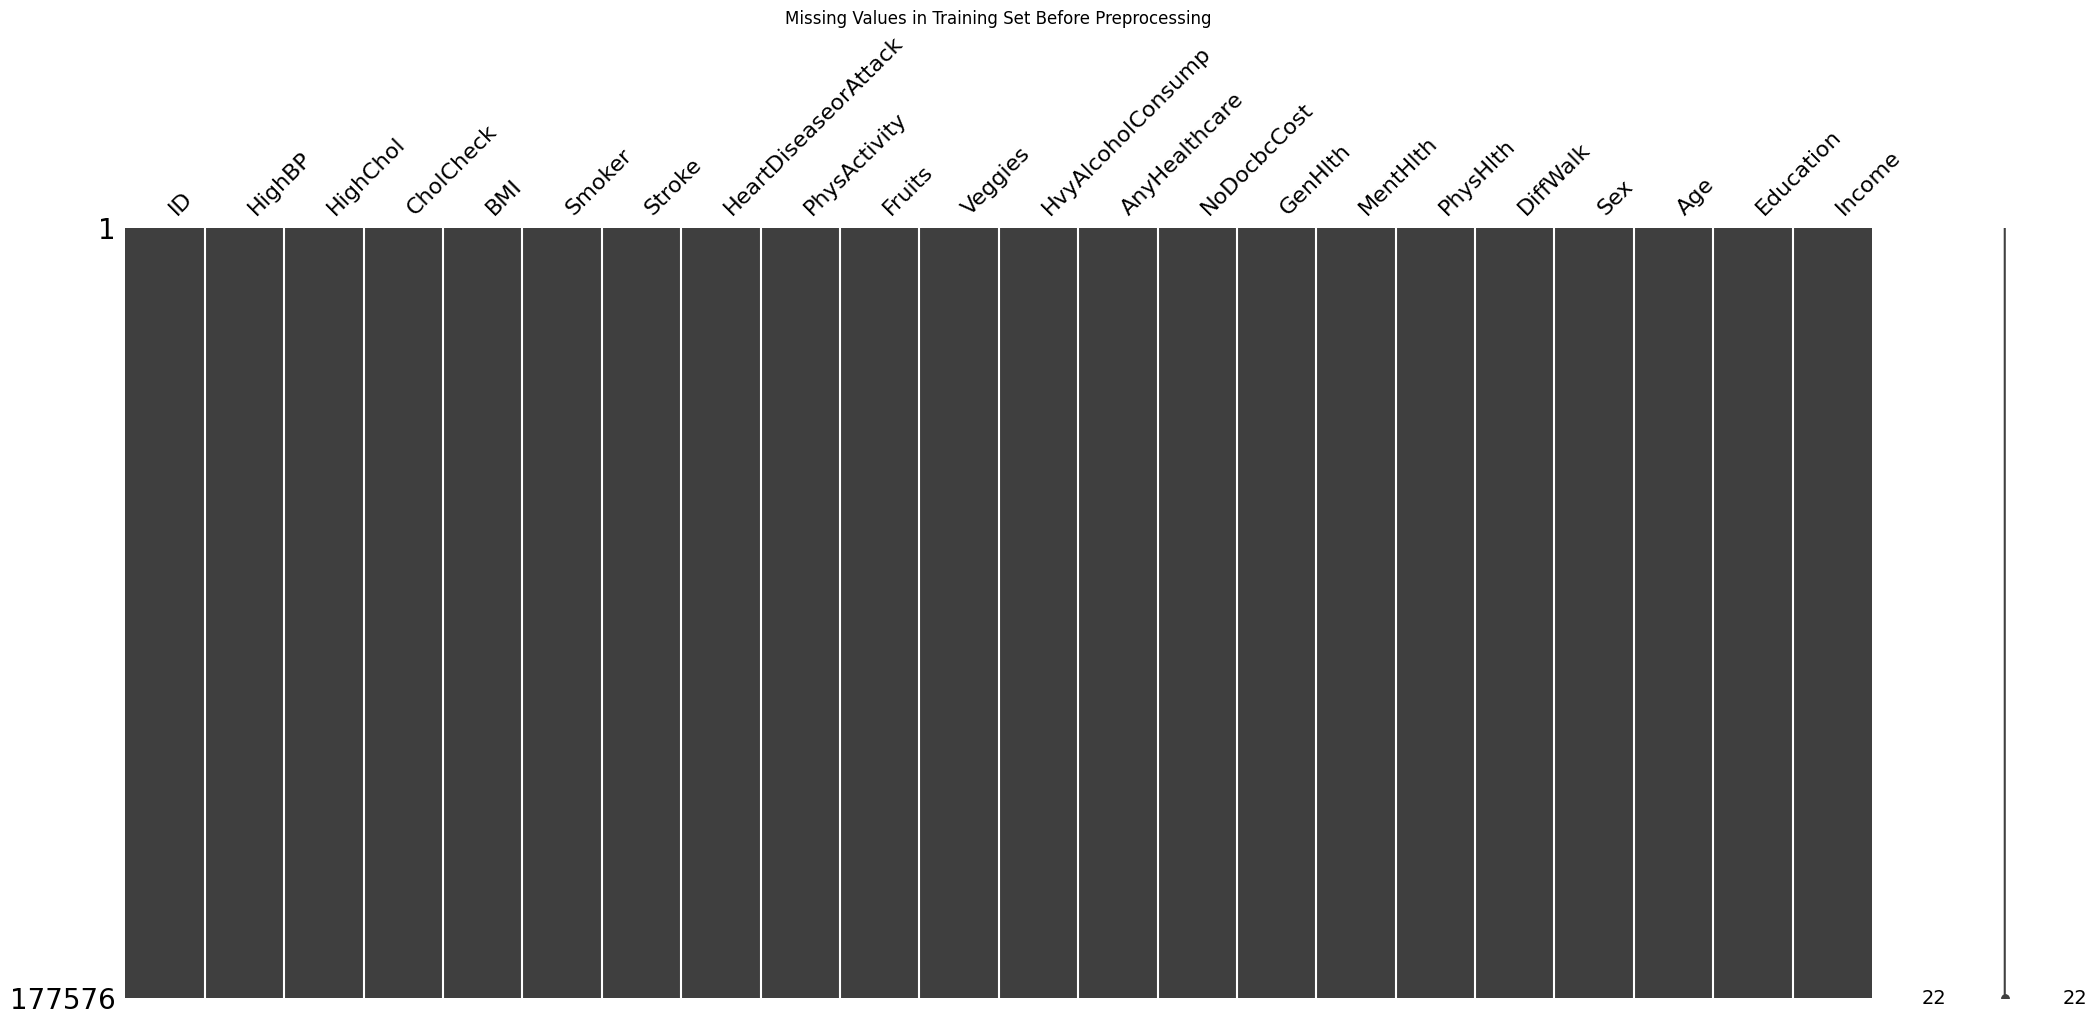

<Figure size 1200x600 with 0 Axes>

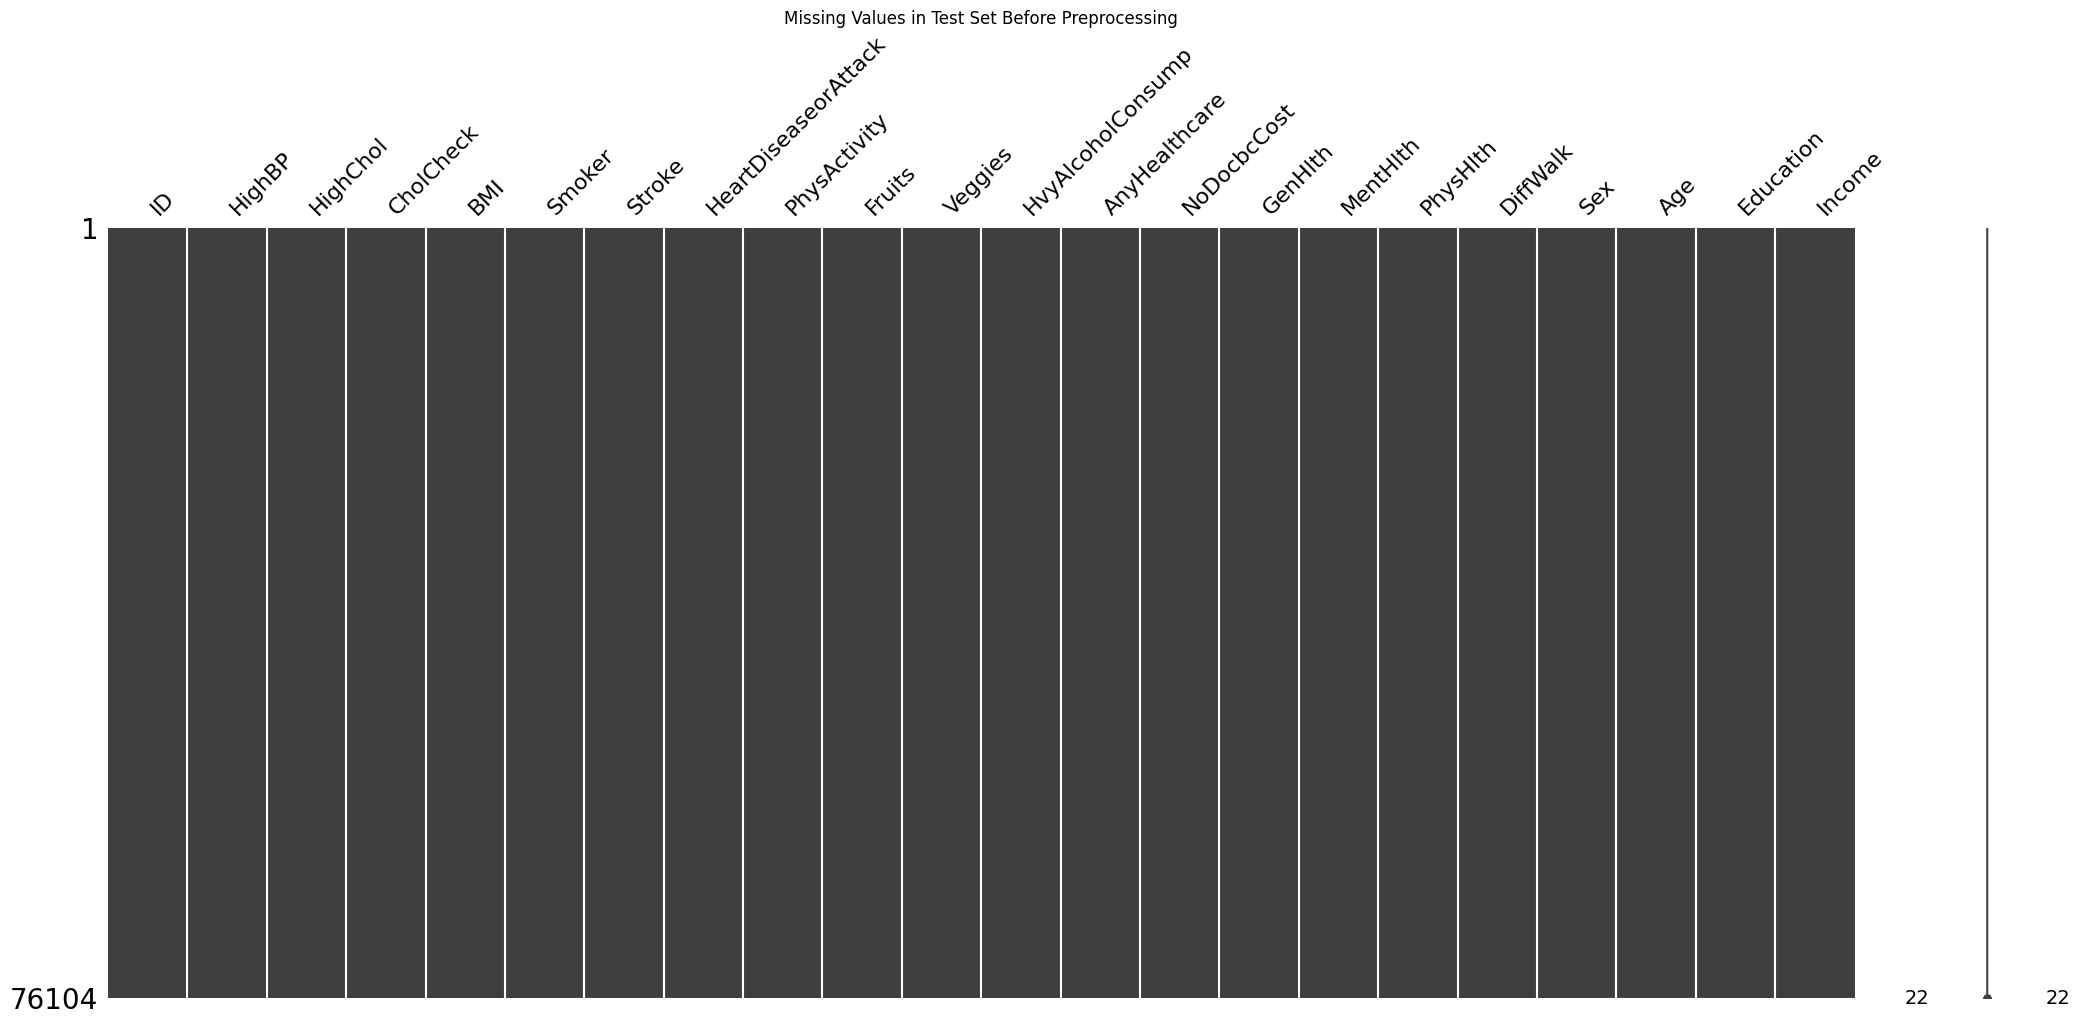

<ipython-input-27-40af285f4cab>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


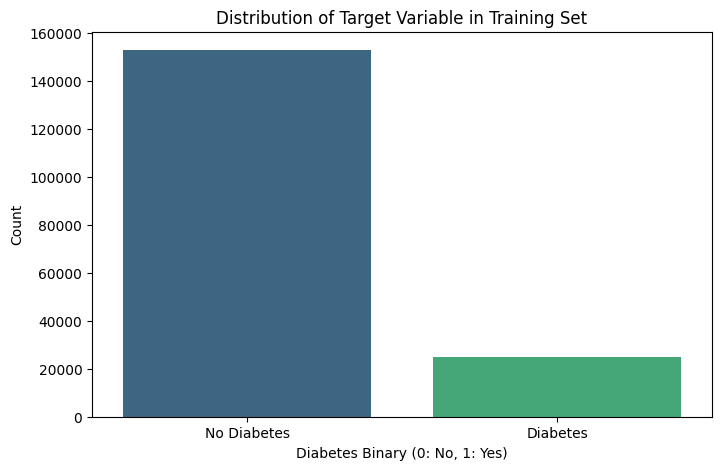

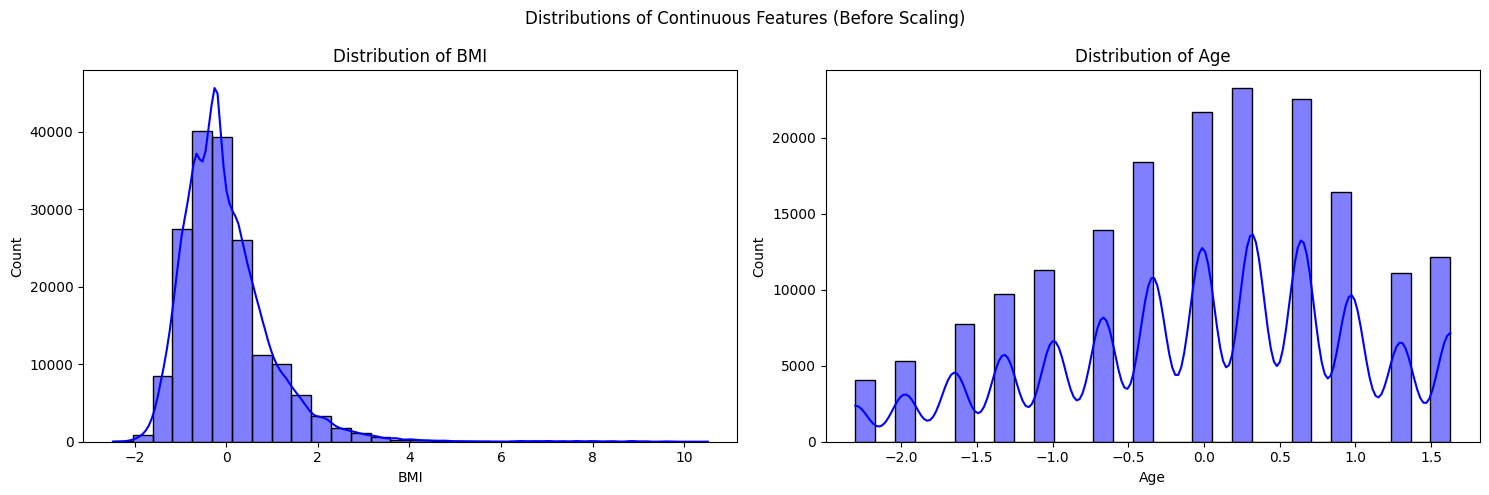

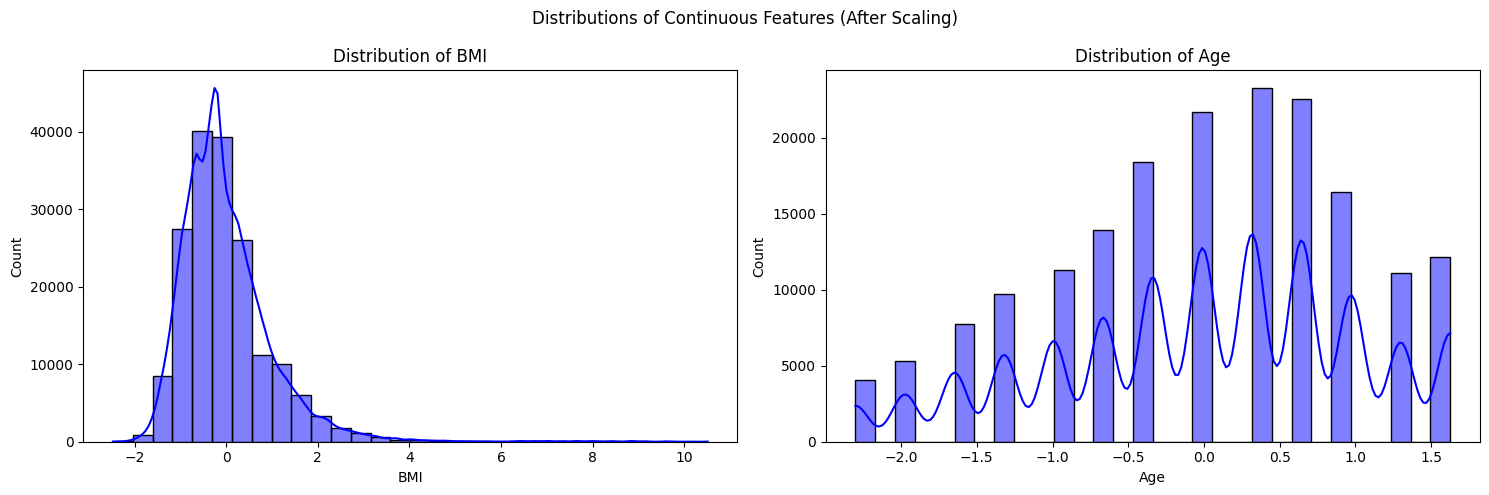

<ipython-input-27-40af285f4cab>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


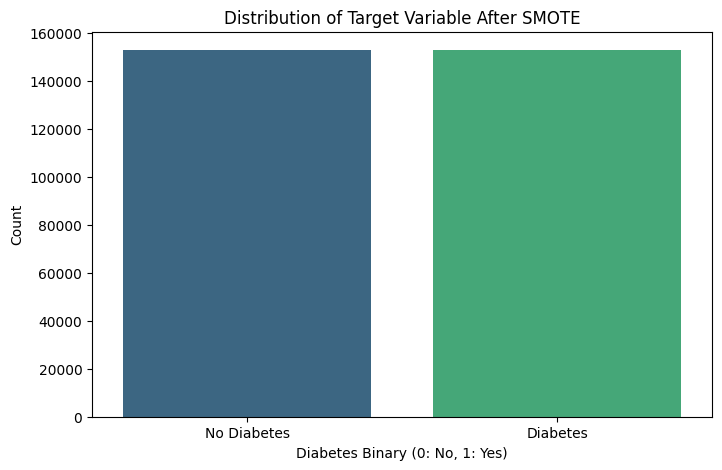

In [27]:
# STEP 1: Visualize Missing Values
import missingno as msno

# Visualize missing values in training set before preprocessing
plt.figure(figsize=(12, 6))
msno.matrix(X_train)
plt.title('Missing Values in Training Set Before Preprocessing')
plt.show()

# Visualize missing values in test set before preprocessing
plt.figure(figsize=(12, 6))
msno.matrix(X_test)
plt.title('Missing Values in Test Set Before Preprocessing')
plt.show()

# STEP 2: Plot the Distribution of the Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Diabetes Binary (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# STEP 3: Plot Feature Distributions Before and After Scaling
# Create a function to plot the distributions
def plot_feature_distribution(df, title, feature_list):
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(feature_list):
        plt.subplot(1, len(feature_list), i + 1)
        sns.histplot(df[feature], kde=True, color='blue', bins=30)
        plt.title(f'Distribution of {feature}')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot distributions before scaling
plot_feature_distribution(X_train[continuous_features], 'Distributions of Continuous Features (Before Scaling)', continuous_features)

# STEP 4: Plot Feature Distributions After Scaling
# Rescale the training set features to visualize changes
X_train_scaled = scaler.fit_transform(X_train[continuous_features])

# Create a DataFrame for scaled features
scaled_df = pd.DataFrame(X_train_scaled, columns=continuous_features)

# Plot distributions after scaling
plot_feature_distribution(scaled_df, 'Distributions of Continuous Features (After Scaling)', continuous_features)

# STEP 5: Visualize Class Distribution After SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Distribution of Target Variable After SMOTE')
plt.xlabel('Diabetes Binary (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


Descriptive Statistics

In [28]:
# Descriptive Statistics
print("Descriptive Statistics for Training Set:")
print(X_train.describe())
print("\nDescriptive Statistics for Testing Set:")
print(X_test.describe())


Descriptive Statistics for Training Set:
                  ID         HighBP       HighChol      CholCheck  \
count  177576.000000  177576.000000  177576.000000  177576.000000   
mean   126705.301167       0.428515       0.423407       0.962574   
std     73221.139342       0.494865       0.494100       0.189804   
min         0.000000       0.000000       0.000000       0.000000   
25%     63298.500000       0.000000       0.000000       1.000000   
50%    126621.500000       0.000000       0.000000       1.000000   
75%    190136.250000       1.000000       1.000000       1.000000   
max    253678.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  1.775760e+05  177576.000000  177576.000000         177576.000000   
mean   1.222811e-16       0.443298       0.040518              0.094585   
std    1.000003e+00       0.496776       0.197171              0.292641   
min   -2.473995e+00       0.000000   

CORRELATION MATRIX

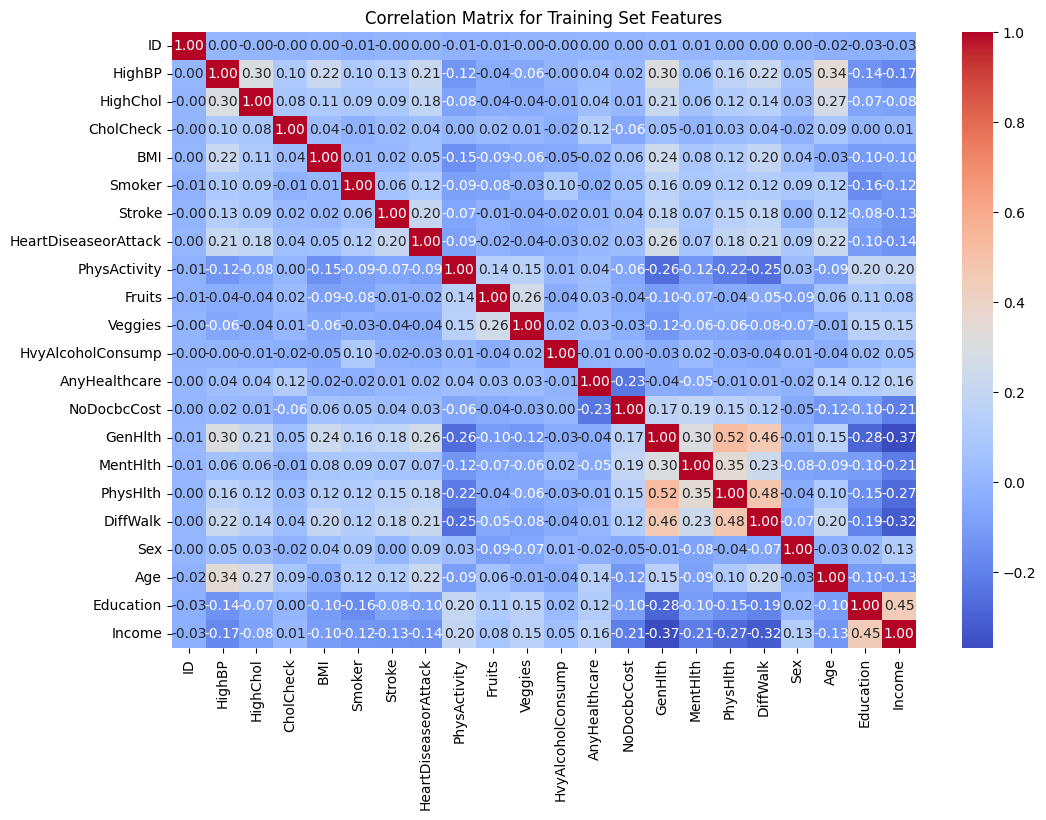

In [29]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Training Set Features')
plt.show()

Class Imbalance Check Before and After SMOTE

In [30]:
# Class Imbalance Before and After SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution before SMOTE:
Diabetes_binary
0    152729
1     24847
Name: count, dtype: int64

Class distribution after SMOTE:
Diabetes_binary
1    152729
0    152729
Name: count, dtype: int64


Data Types and Unique Values

In [31]:
# Data Types and Unique Values
print("Data Types and Unique Values:")
print(X_train.dtypes)
print("\nUnique Values in Each Column:")
for column in X_train.columns:
    print(f"{column}: {X_train[column].nunique()}")


Data Types and Unique Values:
ID                        int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                     float64
Education                 int64
Income                    int64
dtype: object

Unique Values in Each Column:
ID: 177576
HighBP: 2
HighChol: 2
CholCheck: 2
BMI: 81
Smoker: 2
Stroke: 2
HeartDiseaseorAttack: 2
PhysActivity: 2
Fruits: 2
Veggies: 2
HvyAlcoholConsump: 2
AnyHealthcare: 2
NoDocbcCost: 2
GenHlth: 5
MentHlth: 31
PhysHlth:

Visualizing the Preprocessed Data

In [32]:
# Display Sample of Preprocessed Data
print("Sample of Preprocessed Training Data:")
print(X_train_resampled.head())


Sample of Preprocessed Training Data:
       ID  HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0   51457       1         1          1  0.999957       0       0   
1  104586       1         1          1  1.302039       1       0   
2  135715       0         0          1 -0.057333       0       0   
3  229271       0         0          1 -0.812540       0       0   
4  107891       0         0          1  0.244750       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1       1  ...              1   
1                     0             1       1  ...              1   
2                     0             1       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  \
0            0        5         0        14         1    0  1.2999